# Task-D: Collinear features and their effect on linear models

## Imports

In [344]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from beautifultable  import BeautifulTable

## Data Prep

In [345]:
data = pd.read_csv('task_d.csv')

In [346]:
data.head()

x         y         z       x*x       2*y  2*z+3*x*x         w  \
0 -0.581066  0.841837 -1.012978 -0.604025  0.841837  -0.665927 -0.536277   
1 -0.894309 -0.207835 -1.012978 -0.883052 -0.207835  -0.917054 -0.522364   
2 -1.207552  0.212034 -1.082312 -1.150918  0.212034  -1.166507  0.205738   
3 -1.364174  0.002099 -0.943643 -1.280666  0.002099  -1.266540 -0.665720   
4 -0.737687  1.051772 -1.012978 -0.744934  1.051772  -0.792746 -0.735054   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [347]:
x_train = data.drop(['target'], axis=1).values
y_train = data['target'].values

## Defining Objective

 Doing perturbation test to check the presence of collinearity  

 Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

### Task 1 : Implementing Logistic Regression

#### A: Correlation Heat Map

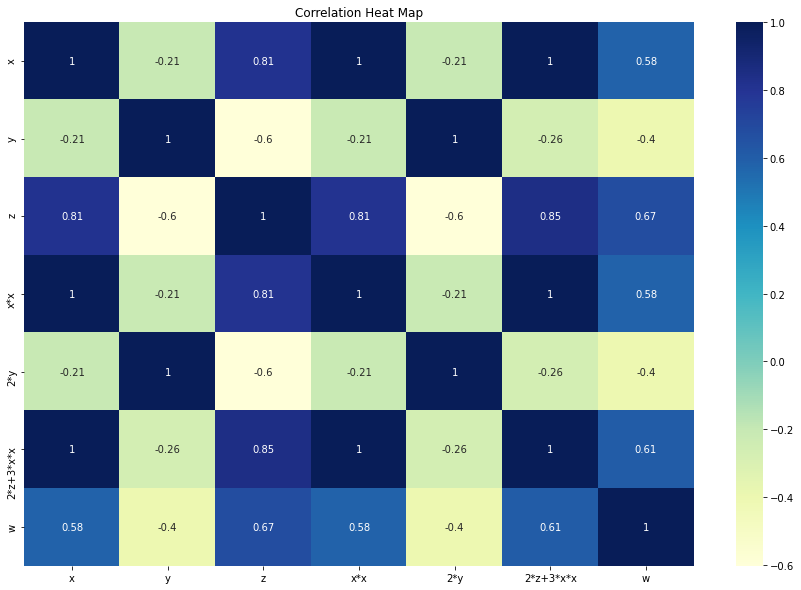

In [348]:
# Correlation
_, ax = plt.subplots(1,1,figsize=(15,10))
sns.heatmap(np.corrcoef(x_train.T), annot=True, ax=ax, cmap="YlGnBu", xticklabels=data.columns[:-1].tolist(),
            yticklabels=data.columns[:-1].tolist())
ax.set_title('Correlation Heat Map')
plt.show()

#### B: Logistic Regression With Hyperparamenter Tuning

In [349]:
clf = SGDClassifier(loss='log', random_state=42)
# chossing value in logspace
parameters = {'alpha':np.logspace(2,5,10,base=2,endpoint=True)}
# Since the task is of classfication and there are only two classes 
grid = GridSearchCV(clf, parameters,scoring='accuracy', cv=3,return_train_score=True,n_jobs=-1)
grid.fit(x_train,y_train)
# Converting the CV resutls into a dataframe for easy plotting
df = pd.DataFrame(grid.cv_results_)

In [350]:
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001623      0.000007         0.000528        0.000003           4   
1       0.001635      0.000006         0.000512        0.000008     5.03968   
2       0.002628      0.001426         0.000616        0.000131      6.3496   
3       0.002645      0.000425         0.000810        0.000006           8   
4       0.002365      0.000203         0.000754        0.000060     10.0794   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 4.0}           0.794118           1.000000   
1   {'alpha': 5.039684199579493}           0.794118           0.939394   
2  {'alpha': 6.3496042078727974}           0.735294           0.848485   
3                 {'alpha': 8.0}           0.676471           0.757576   
4  {'alpha': 10.079368399158984}           0.647059           0.727273   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.878788         0.890969        0.084491                1   
1           0.787879         0.840463        0.070001                2   
2           0.666667         0.750149        0.074966                3   
3           0.575758         0.669935        0.074371                4   
4           0.575758         0.650030        0.061891                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.833333            0.880597            0.940299   
1            0.772727            0.850746            0.850746   
2            0.651515            0.761194            0.820896   
3            0.636364            0.686567            0.731343   
4            0.590909            0.641791            0.686567   

   mean_train_score  std_train_score  
0          0.884743         0.043767  
1          0.824740         0.036779  
2          0.744535         0.070145  
3          0.684758         0.038796  
4          0.639756         0.039079

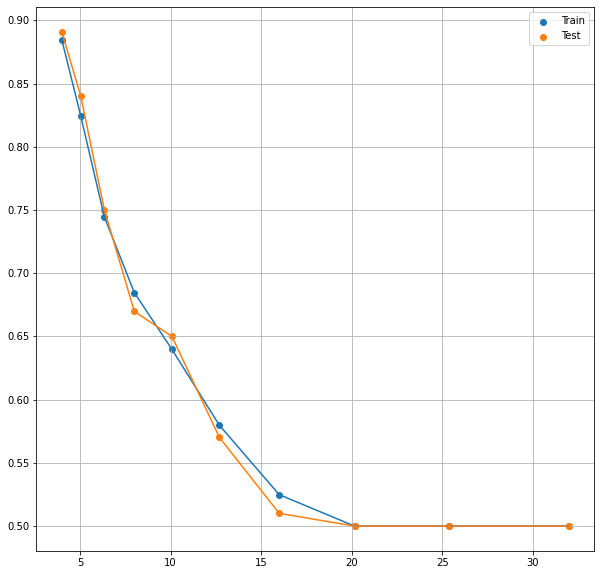

In [351]:
_,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(df['param_alpha'], df['mean_train_score'])
ax.scatter(df['param_alpha'], df['mean_train_score'],label='Train')
ax.plot(df['param_alpha'], df['mean_test_score'])
ax.scatter(df['param_alpha'], df['mean_test_score'], label='Test')
ax.legend()
ax.grid()

In [352]:
best_alpha = df['param_alpha'].iloc[np.argmax(df['mean_test_score'])]
print('Best Alpha {}'.format(best_alpha))

Best Alpha 4.0


In [353]:
best_model = SGDClassifier(loss='log',alpha=best_alpha, random_state=42)
model_weights = []
best_model.fit(x_train,y_train)
print(best_model.coef_[0])
y_pred = best_model.predict(x_train)
model_weights.append(best_model.coef_[0])

[ 0.0701358  -0.07022977  0.09765571  0.06907139 -0.07022977  0.07395507
  0.0619306 ]


In [354]:
accuracy_list = []
accuracy = accuracy_score(y_train,y_pred )
accuracy_list.append(accuracy)

#### C:  Logistic Regression And Hyperparameter Tuning on Noisy Data

In [355]:
x_train = x_train + 5 * 10**-2

In [356]:
clf = SGDClassifier(loss='log', random_state=42)
# Since the task is of classfication and there are only two classes 
grid = GridSearchCV(clf, parameters,scoring='accuracy', cv=3,return_train_score=True,n_jobs=-1)
grid.fit(x_train,y_train)
# Converting the CV resutls into a dataframe for easy plotting
df = pd.DataFrame(grid.cv_results_)

In [357]:
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001037      0.000232         0.000368        0.000060           4   
1       0.001159      0.000317         0.000355        0.000079     5.03968   
2       0.001337      0.000405         0.000441        0.000052      6.3496   
3       0.001451      0.000334         0.000470        0.000114           8   
4       0.001035      0.000129         0.000389        0.000069     10.0794   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 4.0}           0.794118           1.000000   
1   {'alpha': 5.039684199579493}           0.794118           0.969697   
2  {'alpha': 6.3496042078727974}           0.764706           0.848485   
3                 {'alpha': 8.0}           0.676471           0.757576   
4  {'alpha': 10.079368399158984}           0.647059           0.727273   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.878788         0.890969        0.084491                1   
1           0.787879         0.850564        0.084278                2   
2           0.666667         0.759952        0.074303                3   
3           0.606061         0.680036        0.061907                4   
4           0.575758         0.650030        0.061891                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.863636            0.895522            0.940299   
1            0.787879            0.865672            0.850746   
2            0.681818            0.776119            0.820896   
3            0.651515            0.701493            0.731343   
4            0.606061            0.641791            0.686567   

   mean_train_score  std_train_score  
0          0.899819         0.031444  
1          0.834766         0.033709  
2          0.759611         0.057966  
3          0.694784         0.032933  
4          0.644806         0.032936

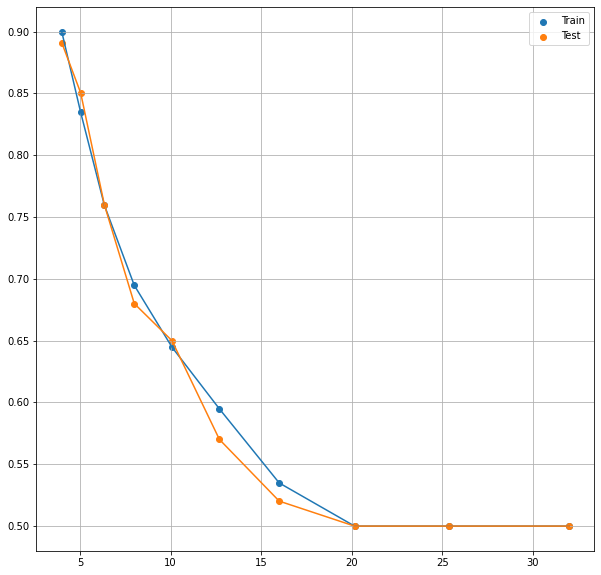

In [358]:
_,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(df['param_alpha'], df['mean_train_score'])
ax.scatter(df['param_alpha'], df['mean_train_score'],label='Train')
ax.plot(df['param_alpha'], df['mean_test_score'])
ax.scatter(df['param_alpha'], df['mean_test_score'], label='Test')
ax.legend()
ax.grid()

In [359]:
best_alpha = df['param_alpha'].iloc[np.argmax(df[df['mean_test_score']<1]['mean_test_score'])]
print('Best Alpha {}'.format(best_alpha))

Best Alpha 4.0


In [360]:
best_model = SGDClassifier(loss='log',alpha=best_alpha, random_state=42)
best_model.fit(x_train,y_train)
print(best_model.coef_[0])
y_pred = best_model.predict(x_train)
model_weights.append(best_model.coef_[0])

[ 0.06930855 -0.07125635  0.09677754  0.06824302 -0.07125635  0.07312498
  0.06103127]


In [361]:
accuracy = accuracy_score(y_train, y_pred)
accuracy_list.append(accuracy)

### Task 2 : Implementing Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

#### B: Linear SVM  With Hyperparameter Tuning

In [362]:
x_train = data.drop(['target'], axis=1).values
y_train = data['target'].values

In [363]:
clf = SGDClassifier(loss='hinge', random_state=42)
# chossing value in logspace
parameters = {'alpha':np.logspace(2,5,10,base=2,endpoint=True)}
# Since the task is of classfication and there are only two classes 
grid = GridSearchCV(clf, parameters,scoring='accuracy', cv=7,return_train_score=True,n_jobs=-1)
grid.fit(x_train,y_train)
# Converting the CV resutls into a dataframe for easy plotting
df = pd.DataFrame(grid.cv_results_)

In [364]:
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001307      0.000399         0.000419        0.000088           4   
1       0.001313      0.000312         0.000414        0.000104     5.03968   
2       0.001439      0.000262         0.000481        0.000043      6.3496   
3       0.001251      0.000388         0.000378        0.000096           8   
4       0.001293      0.000330         0.000407        0.000093     10.0794   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 4.0}           1.000000           1.000000   
1   {'alpha': 5.039684199579493}           1.000000           1.000000   
2  {'alpha': 6.3496042078727974}           0.933333           0.933333   
3                 {'alpha': 8.0}           0.466667           0.666667   
4  {'alpha': 10.079368399158984}           0.466667           0.533333   

   split2_test_score  split3_test_score  ...  rank_test_score  \
0           1.000000           1.000000  ...                1   
1           1.000000           1.000000  ...                2   
2           1.000000           1.000000  ...                3   
3           0.785714           1.000000  ...                4   
4           0.642857           0.928571  ...                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.988235            0.988235            0.965116   
1            0.976471            0.988235            0.941860   
2            0.835294            0.882353            0.895349   
3            0.635294            0.588235            0.767442   
4            0.529412            0.517647            0.686047   

   split3_train_score  split4_train_score  split5_train_score  \
0            1.000000            0.965116            0.976744   
1            0.941860            0.953488            0.941860   
2            0.906977            0.918605            0.906977   
3            0.720930            0.790698            0.779070   
4            0.627907            0.697674            0.674419   

   split6_train_score  mean_train_score  std_train_score  
0            0.976744          0.980027         0.011952  
1            0.953488          0.956752         0.017182  
2            0.918605          0.894880         0.027061  
3            0.802326          0.726285         0.077254  
4            0.697674          0.632969         0.072661  

[5 rows x 25 columns]

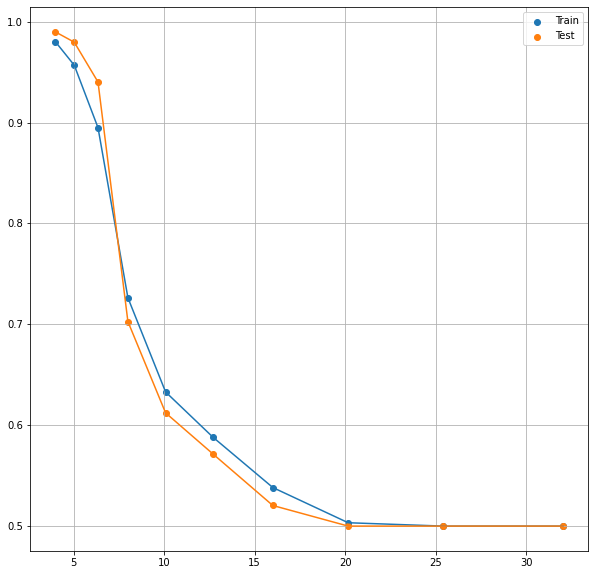

In [365]:
_,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(df['param_alpha'], df['mean_train_score'])
ax.scatter(df['param_alpha'], df['mean_train_score'],label='Train')
ax.plot(df['param_alpha'], df['mean_test_score'])
ax.scatter(df['param_alpha'], df['mean_test_score'], label='Test')
ax.legend()
ax.grid()

In [366]:
best_alpha = df['param_alpha'].iloc[np.argmax(df['mean_test_score'])]
print('Best Alpha {}'.format(best_alpha))

Best Alpha 4.0


In [367]:
best_model = SGDClassifier(loss='hinge',alpha=best_alpha, random_state=42)
best_model.fit(x_train,y_train)
print(best_model.coef_[0])
y_pred = best_model.predict(x_train)
model_weights.append(best_model.coef_[0])

[ 0.11199595 -0.14155372  0.18549634  0.10759647 -0.14155372  0.1192332
  0.1097006 ]


In [368]:
acccuracy = accuracy_score(y_train,y_pred )
accuracy_list.append(accuracy)

#### C: Linear Regression With Hyperparameter Tuning On Noisy Data

In [369]:
x_train = x_train + 5 * 10**-2

In [370]:
clf = SGDClassifier(loss='hinge', random_state=42)
# Since the task is of classfication and there are only two classes 
grid = GridSearchCV(clf, parameters,scoring='accuracy', cv=3,return_train_score=True,n_jobs=-1)
grid.fit(x_train,y_train)
# Converting the CV resutls into a dataframe for easy plotting
df = pd.DataFrame(grid.cv_results_)

In [371]:
df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001291      0.000307         0.000391        0.000068           4   
1       0.002150      0.000464         0.000684        0.000048     5.03968   
2       0.002176      0.000128         0.000664        0.000090      6.3496   
3       0.001869      0.000196         0.000683        0.000157           8   
4       0.001962      0.000423         0.000616        0.000127     10.0794   

                          params  split0_test_score  split1_test_score  \
0                 {'alpha': 4.0}           0.911765           1.000000   
1   {'alpha': 5.039684199579493}           0.882353           1.000000   
2  {'alpha': 6.3496042078727974}           0.735294           0.969697   
3                 {'alpha': 8.0}           0.647059           0.848485   
4  {'alpha': 10.079368399158984}           0.558824           0.727273   

   split2_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.939394         0.950386        0.036851                1   
1           0.909091         0.930481        0.050355                2   
2           0.818182         0.841058        0.097052                3   
3           0.666667         0.720737        0.090686                4   
4           0.575758         0.620618        0.075733                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.969697            0.970149            0.970149   
1            0.878788            0.925373            0.955224   
2            0.696970            0.880597            0.910448   
3            0.621212            0.716418            0.820896   
4            0.560606            0.656716            0.716418   

   mean_train_score  std_train_score  
0          0.969998         0.000213  
1          0.919795         0.031453  
2          0.829338         0.094389  
3          0.719509         0.081550  
4          0.644580         0.064186

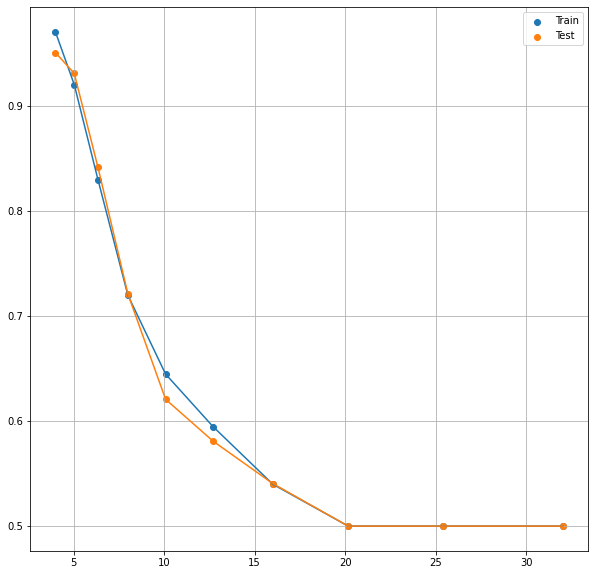

In [372]:
_,ax = plt.subplots(1,1,figsize=(10,10))
ax.plot(df['param_alpha'], df['mean_train_score'])
ax.scatter(df['param_alpha'], df['mean_train_score'],label='Train')
ax.plot(df['param_alpha'], df['mean_test_score'])
ax.scatter(df['param_alpha'], df['mean_test_score'], label='Test')
ax.legend()
ax.grid()

In [373]:
best_alpha = df['param_alpha'].iloc[np.argmax(df['mean_test_score'])]
print('Best Alpha {}'.format(best_alpha))

Best Alpha 4.0


In [374]:
best_model = SGDClassifier(loss='hinge',alpha=best_alpha, random_state=42)
best_model.fit(x_train,y_train)
print(best_model.coef_[0])
y_pred = best_model.predict(x_train)
model_weights.append(best_model.coef_[0])

[ 0.10972406 -0.14385874  0.18320427  0.10532797 -0.14385874  0.11696468
  0.10734983]


In [375]:
accuracy = accuracy_score(y_train,y_pred )
accuracy_list.append(accuracy)

## Observations

In [376]:
table = BeautifulTable()
table.column_headers =['Model Type', 'Accuracy']
table.append_row(['Logistic Classification + Original Data', accuracy_list[0]])
table.append_row(['Logistic Classification + Modified Data', accuracy_list[1]])
table.append_row(['Linear SVM Classification + Original Data', accuracy_list[2]])
table.append_row(['Linear Classification + Modified Data', accuracy_list[3]])
print('Model Accuracy')
print(table)

Model Accuracy
+-------------------------------------------+----------+
|                Model Type                 | Accuracy |
+-------------------------------------------+----------+
|  Logistic Classification + Original Data  |   0.89   |
+-------------------------------------------+----------+
|  Logistic Classification + Modified Data  |   0.88   |
+-------------------------------------------+----------+
| Linear SVM Classification + Original Data |   0.88   |
+-------------------------------------------+----------+
|   Linear Classification + Modified Data   |   0.99   |
+-------------------------------------------+----------+


In [377]:
table = BeautifulTable()
table.column_headers =['Model Type', 'Delta Accuracy']
table.append_row(['Logistic Regression ', np.absolute(accuracy_list[0] - accuracy_list[1])])
table.append_row(['Linear SVM Model + Modified Data', np.absolute(accuracy_list[2] - accuracy_list[3])])
print('Model Accuracy Difference')
print(table)

Model Accuracy Difference
+----------------------------------+----------------+
|            Model Type            | Delta Accuracy |
+----------------------------------+----------------+
|       Logistic Regression        |      0.01      |
+----------------------------------+----------------+
| Linear SVM Model + Modified Data |      0.11      |
+----------------------------------+----------------+


In [378]:
table = BeautifulTable()
lr =  np.round(np.absolute(model_weights[0] - model_weights[1]),4)
svm =  np.round(np.absolute(model_weights[2] - model_weights[3]),4)
col = ['Model Type']
col.extend(data.columns[:-1].tolist())
table.column_headers = col
table.append_row(['Logistic Regression ',lr[0], lr[1], lr[2], lr[3], lr[4], lr[5], lr[6]])
table.append_row(['Linear SVM Model ', svm[0], svm[1], svm[2], svm[3], svm[4], svm[5], svm[6]])
print('Model Weigths Difference')
print(table)

Model Weigths Difference
+--------------------+-------+-------+-------+-------+-------+---------+-------+
|     Model Type     |   x   |   y   |   z   |  x*x  |  2*y  | 2*z+3*x |   w   |
|                    |       |       |       |       |       |   *x    |       |
+--------------------+-------+-------+-------+-------+-------+---------+-------+
| Logistic Regressio | 0.001 | 0.001 | 0.001 | 0.001 | 0.001 |  0.001  | 0.001 |
|         n          |       |       |       |       |       |         |       |
+--------------------+-------+-------+-------+-------+-------+---------+-------+
| Linear SVM Model   | 0.002 | 0.002 | 0.002 | 0.002 | 0.002 |  0.002  | 0.002 |
+--------------------+-------+-------+-------+-------+-------+---------+-------+


In [379]:
ele_dict = {}

ind = 0
for ele,val in zip(lr,data.columns[:-1].tolist()):
    ele_dict[val] = (ele/model_weights[0][ind]) * 100
    
lr_dict = {k:v for k,v in sorted(ele_dict.items() , key=lambda x: x[1])}

ele_dict = {}

ind = 0
for ele,val in zip(svm,data.columns[:-1].tolist()):
    ele_dict[val] = (ele/model_weights[2][ind]) * 100

svm_dict = {k:v for k,v in sorted(ele_dict.items() , key=lambda x: x[1])}

table = BeautifulTable()
print('\nTop 4 changes in weights in Logistic Regression Model')
table.column_headers = ['Feature', 'Absoulte Percent Change in Value']
for key in list(lr_dict.keys())[:4]:
    table.append_row([key, lr_dict[key]])
print(table)    

table = BeautifulTable()
table.column_headers = ['Feature', 'Absoulte Percent Change in Value']
print('\nTop 4 changes in weights in Linear SVM Model')
for key in list(svm_dict.keys())[:4]:
    table.append_row([key, svm_dict[key]])
    
print(table)


Top 4 changes in weights in Logistic Regression Model
+-----------+----------------------------------+
|  Feature  | Absoulte Percent Change in Value |
+-----------+----------------------------------+
|     x     |              1.141               |
+-----------+----------------------------------+
|    x*x    |              1.141               |
+-----------+----------------------------------+
| 2*z+3*x*x |              1.141               |
+-----------+----------------------------------+
|     z     |              1.283               |
+-----------+----------------------------------+

Top 4 changes in weights in Linear SVM Model
+---------+----------------------------------+
| Feature | Absoulte Percent Change in Value |
+---------+----------------------------------+
|    x    |              2.054               |
+---------+----------------------------------+
|    y    |              2.054               |
+---------+----------------------------------+
|    z    |              2.054 